# TD1 - Exercice 5

La signature acoustique d’un train est donnée par la figure ci-dessous.

1. Quel est le niveau équivalent $L_{eq}$ de ce signal pour une durée d’observation de 40 s (temps de passage du train) ?
2. Quel est le niveau équivalent sur une heure $L'_{eq}$ pour le passage d’un seul convoi ?
3. Même question s’il y a dix passages de trains dans l’heure.

In [1]:
"""
INSA Lyon - Département Génie Civil et Urbanisme
Travaux dirigés d'acoustique du bâtiment

Copyright © 2021 Christian Obrecht <christian.obrecht@insa-lyon.fr>

Ce document est distribué sous licence Creative Commons CC-BY-NC-SA
"""

from math import log, log10
from numpy import linspace
import matplotlib.pyplot as plt

# Représentation graphique
def draw(x, lx, y, ly, size = (12, 4), diagram = plt.plot):
    plt.figure(figsize = size)
    plt.xlabel(lx)
    plt.ylabel(ly)
    plt.grid(alpha =.6, linestyle =':')
    diagram(x, y)
    plt.show()

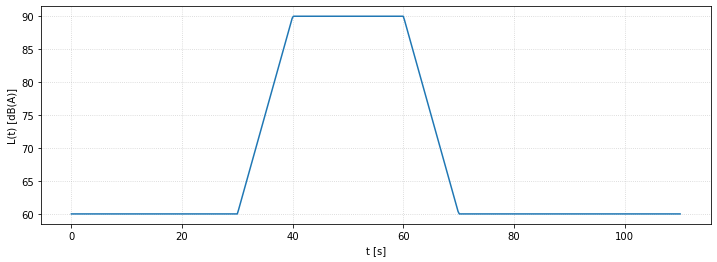

In [2]:
# Signature acoustique
def L(t):
    if t >= 30 and t < 40:
        return 60 + 3*(t - 30)
    if t >= 40 and t < 60:
        return 90
    if t >= 60 and t < 70:
        return 90 + 3*(60 - t)
    return 60

x = linspace(0, 110, 500) # Temps
y = [L(t) for t in x] # Pression
draw(x, 't [s]', y, 'L(t) [dB(A)]')

# 1. Niveau équivalent pour 40 s
$$L_{eq}=10\log\left(\frac{1}{T}\int_0^T 10^\frac{L(t)}{10}{\rm d}t\right)$$

$$L_{eq}=10\log\left(\frac{I_1+I_2+I_3}{40}\right)\textrm{ avec }
I_1 = \int_{30}^{40} 10^\frac{L(t)}{10}{\rm d}t,\ 
I_2 = \int_{40}^{60} 10^\frac{L(t)}{10}{\rm d}t,\ 
I_3 = \int_{60}^{70} 10^\frac{L(t)}{10}{\rm d}t$$

$$I_1 = I_3 = \int_{0}^{10} 10^\frac{60+3t}{10}{\rm d}t$$

$$=10^6\int_0^{10} \exp\left(\frac{3\ln10}{10}t\right){\rm d}t$$

$$=\frac{10^7}{3\ln10}\left[\exp\left(\frac{3\ln10}{10}t\right)\right]_0^{10}=\frac{333\times10^7}{\ln10}$$

$$I_2 = \int_{0}^{20} 10^9{\rm d}t = 2\times10^{10}$$

$$L_{eq} = 10\log\left(\frac{I_1+I_2+I_3}{40}\right)$$

In [3]:
I1 = 333e7/log(10)
I2 = 2e10
Leq = 10*log10((2*I1+I2)/40)
print(f"Leq = {Leq:.1f} dB")

Leq = 87.6 dB


# 2. Niveau équivalent pour 1 h
$$L_{eq}=10\log\left(\frac{1}{T}\int_0^T 10^\frac{L(t)}{10}{\rm d}t\right)$$

$$L'_{eq}=10\log\left[\frac{1}{3600}\left(I_1+I_2+I_3+3560\times10^\frac{60}{10}\right)\right]$$

In [4]:
Leq1 = 10*log10((2*I1+I2+3560e6)/3600)
print(f"L'eq = {Leq1:.1f} dB")

L'eq = 68.7 dB


# 3. Niveau équivalent pour 10 passages

$$L''_{eq}=10\log\left[\frac{1}{3600}\left(10(I_1+I_2+I_3)+3200\times10^\frac{60}{10}\right)\right]$$

In [5]:
Leq10 = 10*log10((20*I1+10*I2+3200e6)/3600)
print(f'L"eq = {Leq10:.1f} dB')

L"eq = 78.1 dB
